In [1]:
# primero voy a revisar ambos datasets y voy a hacer mi propia limpieza y añadir datos para crear un dataset final

In [84]:
import pandas as pd
import zipfile as zp

zipfile = zp.ZipFile('dataset.zip', 'r')
zipfile.extractall()
raw_dataset_1 = pd.read_csv('mozilla_bug_report_data.csv')

raw_dataset_1

,bug_id,creation_date,component_name,product_name,short_description,long_description,assignee_name,reporter_name,resolution_category,resolution_code,status_category,status_code,update_date,quantity_of_votes,quantity_of_comments,resolution_date,bug_fix_time,severity_category,severity_code
0,BUGZILLA-294734,2005-05-18,Bugzilla-General,BUGZILLA,Emergency 2.16.10 Release,2.16.9 is broken -- many users can't enter bug...,mkanat,mkanat,fixed,1,resolved,4,2005-05-19,0,15,2005-05-19,1,blocker,6
1,OTHER_APPLICATIONS-363323,2006-12-09,DOM Inspector,OTHER_APPLICATIONS,DOM View is really inefficient with setting wh...,From comment in url:\n\nCurrent code:\nmenuite...,sdwilsh,sdwilsh,fixed,1,resolved,4,2011-06-01,0,8,2007-01-14,36,normal,2
2,SUPPORT.MOZILLA.ORG-398246,2007-10-02,General,SUPPORT.MOZILLA.ORG,Add support for custom cookies and cache headers,Adding support for custom headers and cookie n...,morgamic,morgamic,fixed,1,resolved,4,2009-11-02,0,23,2008-03-24,174,blocker,6
3,RELEASE_ENGINEERING-525991,2009-11-02,General,RELEASE_ENGINEERING,Create Major Update from 3.0.15 to 3.5.5,NaN,catlee,catlee,fixed,1,resolved,4,2013-08-12,0,7,2009-11-10,8,normal,2
4,OTHER_APPLICATIONS-318859,2005-12-02,ChatZilla,OTHER_APPLICATIONS,DCC functionality in ChatZilla isn't functional.,User-Agent: Mozilla/5.0 (Macintosh U PPC...,gijskruitbosch+bugs,dafydd,fixed,1,resolved,4,2006-02-10,0,14,2005-12-07,5,normal,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,WWW.MOZILLA.ORG-485595,2009-03-27,General,WWW.MOZILLA.ORG,Firefox 2.0. - 2.0.0.20 update/what's new page...,User-Agent: Mozilla/5.0 (Windows U Windo...,nobody,domthedude001,fixed,1,resolved,4,2012-08-23,0,15,2010-12-27,640,trivial,1
9995,CORE-132278,2002-03-20,XPCOM,CORE,|nsCOMPtr::operator&()| has outlived its usefu...,We originally made |operator&| illegal to ease...,scc,scc,fixed,1,resolved,4,2003-01-16,0,10,2002-03-28,8,normal,2
9996,FIREFOX_BUILD_SYSTEM-389793,2007-07-26,General,FIREFOX_BUILD_SYSTEM,Firefox build failed on OpenSolaris without --...,gmake[6]: Entering directory `/export/home/mrb...,ginnchen+exoracle,ginnchen+exoracle,fixed,1,resolved,4,2018-03-02,0,15,2007-08-05,10,normal,2
9997,MOZILLA_LOCALIZATIONS-402568,2007-11-05,fy-NL / Frisian,MOZILLA_LOCALIZATIONS,language pack fails to install due to broken i...,The files \n l10n/fy-NL/browser/defines.inc\n...,fryskefirefox,nthomas,fixed,1,resolved,4,2009-11-27,0,3,2009-11-27,753,normal,2


In [106]:
# Ahora quiero hacer una limpieza de los datos creo que lo mejor es hacer un heatmap para ver que datos faltan y que datos no
# y una cross table para ver que datos son redundantes entre si.
# también viendo los dos dataset claramente voy a utilizar los de mozilla ya que tienen mas datos y son mas completos
# Creo que ahora también es obvio que va a haber un label encoding para los datos categoricos.

In [107]:
drop_columns = raw_dataset_1.drop(['update_date','quantity_of_votes','quantity_of_comments','creation_date','reporter_name','resolution_date','resolution_code','status_code','bug_fix_time','product_name','resolution_category','short_description'],axis=1)
drop_columns

,bug_id,component_name,long_description,assignee_name,status_category,severity_category,severity_code
0,BUGZILLA-294734,Bugzilla-General,2.16.9 is broken -- many users can't enter bug...,mkanat,resolved,blocker,6
1,OTHER_APPLICATIONS-363323,DOM Inspector,From comment in url:\n\nCurrent code:\nmenuite...,sdwilsh,resolved,normal,2
2,SUPPORT.MOZILLA.ORG-398246,General,Adding support for custom headers and cookie n...,morgamic,resolved,blocker,6
3,RELEASE_ENGINEERING-525991,General,NaN,catlee,resolved,normal,2
4,OTHER_APPLICATIONS-318859,ChatZilla,User-Agent: Mozilla/5.0 (Macintosh U PPC...,gijskruitbosch+bugs,resolved,normal,2
...,...,...,...,...,...,...,...
9994,WWW.MOZILLA.ORG-485595,General,User-Agent: Mozilla/5.0 (Windows U Windo...,nobody,resolved,trivial,1
9995,CORE-132278,XPCOM,We originally made |operator&| illegal to ease...,scc,resolved,normal,2
9996,FIREFOX_BUILD_SYSTEM-389793,General,gmake[6]: Entering directory `/export/home/mrb...,ginnchen+exoracle,resolved,normal,2
9997,MOZILLA_LOCALIZATIONS-402568,fy-NL / Frisian,The files \n l10n/fy-NL/browser/defines.inc\n...,fryskefirefox,resolved,normal,2


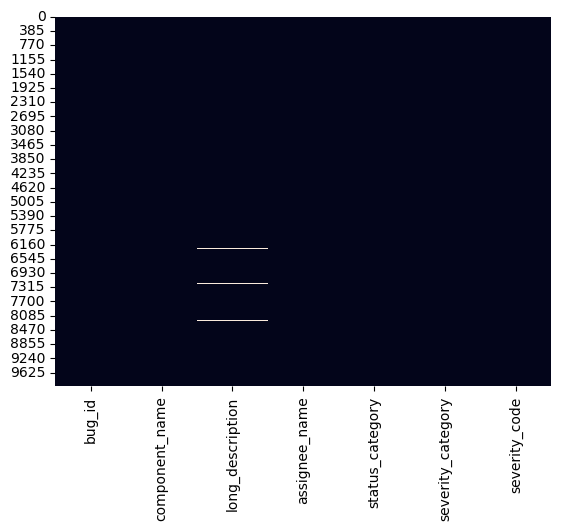

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap = sns.heatmap(drop_columns.isnull(), cbar=False)
plt.show()

In [109]:
# # Ahora voy a hacer una crossvalidation para ver que datos son redundantes entre si
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression



# test
time_spend = pd.read_csv('time_spend.csv')
time_spend_drop_columns = time_spend.drop(['Proyecto', 'Cliente','Tarea','Usuario','Grupo','Correo electrónico','Etiquetas','Facturable','Hora de inicio','Hora de finalización','Duración (decimal)','Tarifa facturable (USD)','Cantidad facturable (USD)','Descripción','Fecha de inicio','Fecha de finalización'], axis=1)
time_spend_drop_columns


,Duración (h)
0,02:22:12
1,01:14:29
2,01:27:36
3,00:00:05
4,00:58:18
5,00:00:02


In [111]:
import random

# pre_final_dataset = time_spend_drop_columns.drop[]
final_dataset = pd.concat([drop_columns, time_spend_drop_columns], axis=1)
dataset = final_dataset.fillna(f'{random.randint(0, 10)} : {random.randint(0, 60)} : {random.randint(0, 60)}')

dataset

,bug_id,component_name,long_description,assignee_name,status_category,severity_category,severity_code,Duración (h)
0,BUGZILLA-294734,Bugzilla-General,2.16.9 is broken -- many users can't enter bug...,mkanat,resolved,blocker,6,02:22:12
1,OTHER_APPLICATIONS-363323,DOM Inspector,From comment in url:\n\nCurrent code:\nmenuite...,sdwilsh,resolved,normal,2,01:14:29
2,SUPPORT.MOZILLA.ORG-398246,General,Adding support for custom headers and cookie n...,morgamic,resolved,blocker,6,01:27:36
3,RELEASE_ENGINEERING-525991,General,2 : 11 : 12,catlee,resolved,normal,2,00:00:05
4,OTHER_APPLICATIONS-318859,ChatZilla,User-Agent: Mozilla/5.0 (Macintosh U PPC...,gijskruitbosch+bugs,resolved,normal,2,00:58:18
...,...,...,...,...,...,...,...,...
9994,WWW.MOZILLA.ORG-485595,General,User-Agent: Mozilla/5.0 (Windows U Windo...,nobody,resolved,trivial,1,2 : 11 : 12
9995,CORE-132278,XPCOM,We originally made |operator&| illegal to ease...,scc,resolved,normal,2,2 : 11 : 12
9996,FIREFOX_BUILD_SYSTEM-389793,General,gmake[6]: Entering directory `/export/home/mrb...,ginnchen+exoracle,resolved,normal,2,2 : 11 : 12
9997,MOZILLA_LOCALIZATIONS-402568,fy-NL / Frisian,The files \n l10n/fy-NL/browser/defines.inc\n...,fryskefirefox,resolved,normal,2,2 : 11 : 12


In [119]:
# Ahora voy a hacer un label encoding para los datos categoricos
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

le = preprocessing.LabelEncoder()
cleaning = le.fit(dataset['severity_category'])

<bound method LabelEncoder.transform of LabelEncoder()>